In [1]:
import numpy as np
import pandas as pd

In [27]:
df=pd.read_csv('diabetes_unclean.csv')
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [28]:
df.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          1
Urea         1
Cr           2
HbA1c        3
Chol         2
TG           2
HDL          1
LDL          2
VLDL         1
BMI          0
CLASS        0
dtype: int64

In [29]:
df=df.fillna(df.mean())
df.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [30]:
df.CLASS.unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [31]:
df['CLASS'].replace(to_replace='Y ',value='Y',inplace=True)
df['CLASS'].replace(to_replace='N ',value='N',inplace=True)

In [32]:
df.CLASS.unique()

array(['N', 'P', 'Y'], dtype=object)

In [33]:
df.Gender.unique()

array(['F', 'M', 'f'], dtype=object)

In [34]:
df['Gender'].replace(to_replace='f',value='F',inplace=True)
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [35]:
df.duplicated().sum()

3

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.drop(columns=['ID','No_Pation'],inplace=True)

In [38]:
Q1=df['Cr'].quantile(0.25)
Q3=df['Cr'].quantile(0.75)
IQR=Q3-Q1
ll=Q1-1.5*IQR
ul=Q3+1.5*IQR
df=df[(df['Cr']>ll) & (df['Cr']<ul)]
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50.0,4.700000,46.000000,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
1,M,26.0,4.500000,62.000000,4.900000,3.7,1.4,1.1,2.1,0.600000,23.0,N
2,F,50.0,4.700000,46.000000,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
3,F,50.0,4.700000,46.000000,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
4,M,33.0,7.100000,46.000000,4.900000,4.9,1.0,0.8,2.0,0.400000,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1001,F,60.0,5.000000,68.973188,8.100000,5.2,3.3,1.4,0.6,3.000000,27.0,Y
1004,M,55.0,5.131094,62.000000,6.800000,5.3,2.0,1.0,3.5,0.900000,30.1,Y
1005,M,55.0,4.800000,88.000000,8.284155,5.7,4.0,0.9,3.3,1.800000,30.0,Y
1006,M,62.0,6.300000,82.000000,6.700000,5.3,2.0,1.0,3.5,1.850595,30.1,Y


In [39]:
df['Gender']=np.where(df['Gender']=='M',0,1)
df['Gender'].unique()

array([1, 0])

In [40]:
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50.0,4.700000,46.000000,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
1,0,26.0,4.500000,62.000000,4.900000,3.7,1.4,1.1,2.1,0.600000,23.0,N
2,1,50.0,4.700000,46.000000,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
3,1,50.0,4.700000,46.000000,4.900000,4.2,0.9,2.4,1.4,0.500000,24.0,N
4,0,33.0,7.100000,46.000000,4.900000,4.9,1.0,0.8,2.0,0.400000,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1001,1,60.0,5.000000,68.973188,8.100000,5.2,3.3,1.4,0.6,3.000000,27.0,Y
1004,0,55.0,5.131094,62.000000,6.800000,5.3,2.0,1.0,3.5,0.900000,30.1,Y
1005,0,55.0,4.800000,88.000000,8.284155,5.7,4.0,0.9,3.3,1.800000,30.0,Y
1006,0,62.0,6.300000,82.000000,6.700000,5.3,2.0,1.0,3.5,1.850595,30.1,Y


<ipython-input-48-fa611219cfa3>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-48-fa611219cfa3>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-48-fa611219cfa3>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-48-fa611219cfa3>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-48-fa611219cfa3>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Best Accuracy Model :  {'ts': 0.5}
Best Accuracy Score :  0.8846960167714885
Best Accuracy Model :  {'ts': 0.1}
Best Accuracy Score :  1.0
['Y']
['Y']


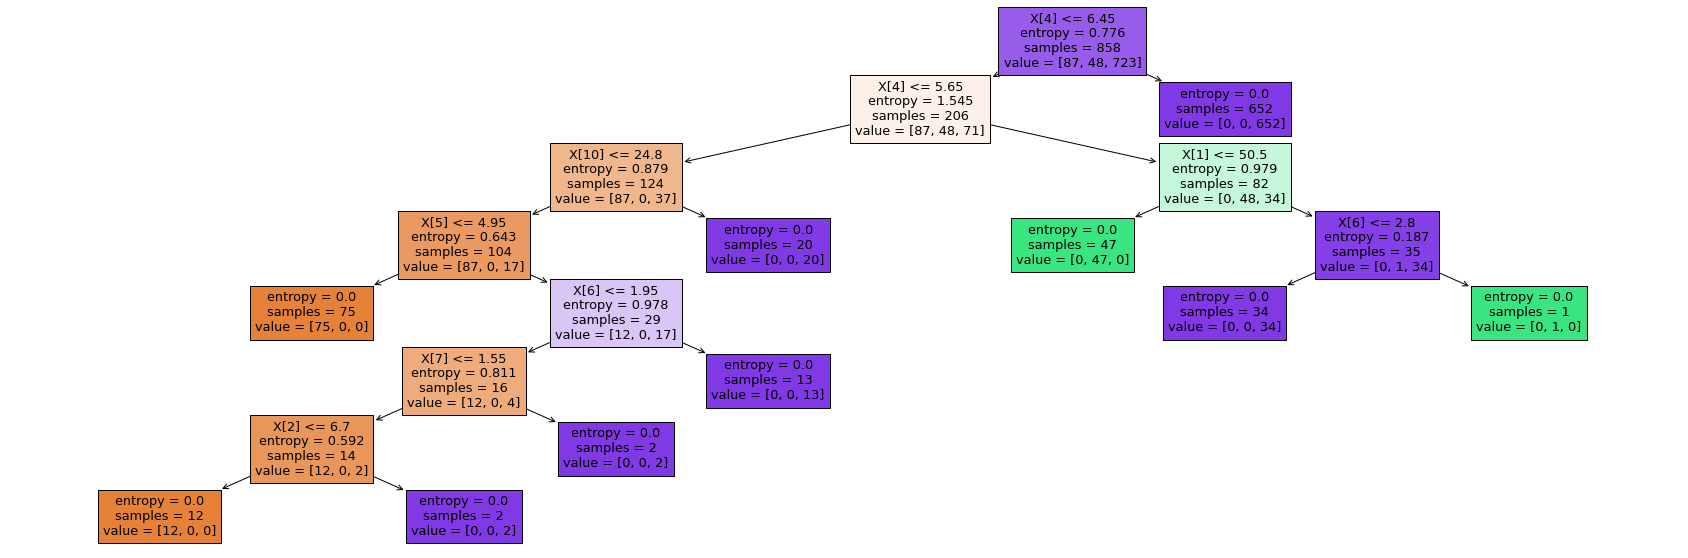

[[10  0  0]
 [ 0  4  0]
 [ 0  0 82]]
              precision    recall  f1-score   support

           N       1.00      1.00      1.00        10
           P       1.00      1.00      1.00         4
           Y       1.00      1.00      1.00        82

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier ,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report


x = df.drop('CLASS',axis=1)
y = df[['CLASS']]
acc_KNN = 0
acc_DT=0
acc_model_KNN = {}
acc_model_DT={}
for i in [0.1,0.2,0.3,0.4,0.5]:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=i,random_state=10)
    model1 = KNeighborsClassifier(n_neighbors=10)
    model1.fit(x_train,y_train)
    y_pred1 = model1.predict(x_test)
    acc1 = accuracy_score(y_test,y_pred1)
    
    modal2=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=7) #max_depth
    modal2.fit(x_train,y_train)
    y_pred2=modal2.predict(x_test)
    acc2=accuracy_score(y_test,y_pred2)
    
    if acc1 > acc_KNN:
        acc_KNN = acc1
        acc_model_KNN = {'ts':i}
    if acc2 > acc_DT:
        acc_DT = acc2
        acc_model_DT = {'ts':i}
        
print("Best Accuracy Model : ",acc_model_KNN)
print("Best Accuracy Score : ",acc_KNN)
print("Best Accuracy Model : ",acc_model_DT)
print("Best Accuracy Score : ",acc_DT)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=acc_model_KNN['ts'],random_state=10)
model1 = KNeighborsClassifier(n_neighbors=10)
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
acc1 = accuracy_score(y_test,y_pred1)
y_KNN=model1.predict([[0,32,4.9,17,4.3,4.3,0.9,2.4,2.3,0.9,26]])
print(y_KNN)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=acc_model_DT['ts'],random_state=10)
modal2=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=7) #max_depth
modal2.fit(x_train,y_train)
y_pred2=modal2.predict(x_test)
acc2=accuracy_score(y_test,y_pred2)
y_DT=modal2.predict([[0,32,4.9,17,4.3,4.3,0.9,2.4,2.3,0.9,26]])
print(y_DT)
plt.figure(figsize=(30,10))
plot_tree(modal2,filled=True)
plt.show()


print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))